In [1]:
from google.colab import files
uploaded = files.upload()


import sys, os

sys.path
sys.executable




Saving chat-data.zip to chat-data.zip
Saving combined-data.zip to combined-data.zip


'/usr/bin/python3'

In [2]:
!apt-get install openjdk-8-jdk-headless

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libxtst6 openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  libxtst6 openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 36.5 MB of archives.
After this operation, 144 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libxtst6 amd64 2:1.2.3-1 [12.8 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 openjdk-8-jre-headless amd64 8u372-ga~us1-0ubuntu1~20.04 [28.3 MB]
Get:3 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 openjdk-8-jdk-headless amd64 8u372-ga~us1-0ubuntu1~20.04 [8,282 kB]
Fetched 

In [3]:
!wget https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz

--2023-05-23 12:53:30--  https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz
Resolving archive.apache.org (archive.apache.org)... 65.108.204.189, 2a01:4f9:1a:a084::2
Connecting to archive.apache.org (archive.apache.org)|65.108.204.189|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 272637746 (260M) [application/x-gzip]
Saving to: ‘spark-3.2.1-bin-hadoop2.7.tgz’

spark-3.2.1-bin-had 100%[===================>] 260.01M  15.7MB/s    in 22s     

2023-05-23 12:53:53 (11.8 MB/s) - ‘spark-3.2.1-bin-hadoop2.7.tgz’ saved [272637746/272637746]



In [4]:
!tar xf spark-3.2.1-bin-hadoop2.7.tgz


In [5]:
!pip install -q findspark


In [6]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop2.7"


In [7]:
import findspark
findspark.init()
findspark.find()

'/content/spark-3.2.1-bin-hadoop2.7'

In [8]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("DataCleaningApp")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [11]:
# THE DATASET FILES


!unzip "/content/chat-data.zip"
!unzip "/content/combined-data.zip"



Archive:  /content/chat-data.zip
  inflating: chat_create_team_chat.csv  
  inflating: chat_item_team_chat.csv  
  inflating: chat_join_team_chat.csv  
  inflating: chat_leave_team_chat.csv  
  inflating: chat_mention_team_chat.csv  
  inflating: chat_respond_team_chat.csv  
Archive:  /content/combined-data.zip
  inflating: combined-data.csv       


# **Exploratory Data Analysis**

In [14]:
############################### EXPLORATORY DATA ANALYSIS

users = spark.read.csv("/content/users.csv", header=True, inferSchema=True)
team = spark.read.csv("/content/team.csv", header=True, inferSchema=True)
adclicks = spark.read.csv("/content/ad-clicks.csv", header=True, inferSchema=True)
buyclicks = spark.read.csv("/content/buy-clicks.csv", header=True, inferSchema=True)

users.show(5)

+-------------------+------+-----------+--------+----------+-------+
|          timestamp|userId|       nick| twitter|       dob|country|
+-------------------+------+-----------+--------+----------+-------+
|2012-06-19 14:53:41|   442|   pcjIOBKW|@SZhyOHv|1994-07-20|     BA|
|2012-06-19 19:29:01|   949|    vAOfUkf|  @nkkNo|1971-04-22|     HU|
|2012-06-20 19:34:59|  1654|     qOOXSQ|  @SwOlw|1970-04-19|     IS|
|2012-06-21 01:18:29|  1586|    px4gW51|@IrCHTnE|1965-11-23|     AM|
|2012-06-21 15:35:00|   599|9gkfwRC73Uc| @VJj0Az|1994-08-23|     CC|
+-------------------+------+-----------+--------+----------+-------+
only showing top 5 rows



In [15]:
users = spark.read.csv("/content/users.csv", header=True, inferSchema=True)

users.show(10)





+-------------------+------+-----------+----------+----------+-------+
|          timestamp|userId|       nick|   twitter|       dob|country|
+-------------------+------+-----------+----------+----------+-------+
|2012-06-19 14:53:41|   442|   pcjIOBKW|  @SZhyOHv|1994-07-20|     BA|
|2012-06-19 19:29:01|   949|    vAOfUkf|    @nkkNo|1971-04-22|     HU|
|2012-06-20 19:34:59|  1654|     qOOXSQ|    @SwOlw|1970-04-19|     IS|
|2012-06-21 01:18:29|  1586|    px4gW51|  @IrCHTnE|1965-11-23|     AM|
|2012-06-21 15:35:00|   599|9gkfwRC73Uc|   @VJj0Az|1994-08-23|     CC|
|2012-06-22 11:36:19|   952| BRbb3VOTti|   @b4OK6K|1986-09-11|     MH|
|2012-06-23 08:11:18|  1056|    fGCIAtI| @IgDsdWdU|1991-11-28|     SM|
|2012-06-23 10:54:19|    91|tpDfgi3S0N9|   @LvTHGO|1977-07-03|     BZ|
|2012-06-23 14:59:26|   809| LkNRpRW6Ez|@ROrRkXwdh|1951-09-25|     PF|
|2012-06-23 17:40:35|    75|     fNWewX|   @OXqLyv|1979-11-12|     JO|
+-------------------+------+-----------+----------+----------+-------+
only s

In [17]:
###### CONVERT DOB TO AGE

from pyspark.sql import functions as f



# Resource for below Code : https://stackoverflow.com/questions/62148704/date-difference-in-years-in-pyspark-dataframe

users_with_age = users.withColumn("age",   (f.months_between(f.current_date(), f.col('dob')) / 12).cast('int'))

users_with_age.show(5)

+-------------------+------+-----------+--------+----------+-------+---+
|          timestamp|userId|       nick| twitter|       dob|country|age|
+-------------------+------+-----------+--------+----------+-------+---+
|2012-06-19 14:53:41|   442|   pcjIOBKW|@SZhyOHv|1994-07-20|     BA| 28|
|2012-06-19 19:29:01|   949|    vAOfUkf|  @nkkNo|1971-04-22|     HU| 52|
|2012-06-20 19:34:59|  1654|     qOOXSQ|  @SwOlw|1970-04-19|     IS| 53|
|2012-06-21 01:18:29|  1586|    px4gW51|@IrCHTnE|1965-11-23|     AM| 57|
|2012-06-21 15:35:00|   599|9gkfwRC73Uc| @VJj0Az|1994-08-23|     CC| 28|
+-------------------+------+-----------+--------+----------+-------+---+
only showing top 5 rows



In [18]:
users_with_age.toPandas()[["age"]].describe().transpose()



/usr/local/lib/python3.10/dist-packages/pyspark/sql/pandas/conversion.py:251: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)


,count,mean,std,min,25%,50%,75%,max
age,2393.0,46.172169,14.065468,24.0,34.0,44.0,57.0,76.0


In [19]:
from pyspark.sql.functions import udf


age_range = udf(lambda age: '< 20' if age < 20 else 
                       '20-39' if (age >= 20 and age < 40) else
                       '40-59' if (age >= 40 and age < 60) else
                       '60-79' if (age >= 60 and age < 80) else        
                       '80-99' if (age >= 80 and age < 100) else ""    
                       )


users_with_age = users_with_age.withColumn('age_group', age_range(users_with_age.age))
users_with_age.show()

+-------------------+------+-----------+----------+----------+-------+---+---------+
|          timestamp|userId|       nick|   twitter|       dob|country|age|age_group|
+-------------------+------+-----------+----------+----------+-------+---+---------+
|2012-06-19 14:53:41|   442|   pcjIOBKW|  @SZhyOHv|1994-07-20|     BA| 28|    20-39|
|2012-06-19 19:29:01|   949|    vAOfUkf|    @nkkNo|1971-04-22|     HU| 52|    40-59|
|2012-06-20 19:34:59|  1654|     qOOXSQ|    @SwOlw|1970-04-19|     IS| 53|    40-59|
|2012-06-21 01:18:29|  1586|    px4gW51|  @IrCHTnE|1965-11-23|     AM| 57|    40-59|
|2012-06-21 15:35:00|   599|9gkfwRC73Uc|   @VJj0Az|1994-08-23|     CC| 28|    20-39|
|2012-06-22 11:36:19|   952| BRbb3VOTti|   @b4OK6K|1986-09-11|     MH| 36|    20-39|
|2012-06-23 08:11:18|  1056|    fGCIAtI| @IgDsdWdU|1991-11-28|     SM| 31|    20-39|
|2012-06-23 10:54:19|    91|tpDfgi3S0N9|   @LvTHGO|1977-07-03|     BZ| 45|    40-59|
|2012-06-23 14:59:26|   809| LkNRpRW6Ez|@ROrRkXwdh|1951-09-25|   

In [20]:

from pyspark.sql import functions as f

data = users_with_age.withColumn(
    'age_group',
    f.when(f.col('age') <= 19, 'teenage')
    .when(f.col('age').between(20, 35), '20-35')
    .when(f.col('age').between(36, 50), '36-50')
    .when(f.col('age').between(51, 65), '51-65')
    .when(f.col('age').between(66, 100), '66-100')
    .otherwise(None)
).toPandas()

data


/usr/local/lib/python3.10/dist-packages/pyspark/sql/pandas/conversion.py:251: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)


,timestamp,userId,nick,twitter,dob,country,age,age_group
0,2012-06-19 14:53:41,442,pcjIOBKW,@SZhyOHv,1994-07-20,BA,28,20-35
1,2012-06-19 19:29:01,949,vAOfUkf,@nkkNo,1971-04-22,HU,52,51-65
2,2012-06-20 19:34:59,1654,qOOXSQ,@SwOlw,1970-04-19,IS,53,51-65
3,2012-06-21 01:18:29,1586,px4gW51,@IrCHTnE,1965-11-23,AM,57,51-65
4,2012-06-21 15:35:00,599,9gkfwRC73Uc,@VJj0Az,1994-08-23,CC,28,20-35
...,...,...,...,...,...,...,...,...
2388,2016-06-11 05:17:17,2312,CJOHXgqKh,@ZomNVFWoF,1996-10-05,MT,26,20-35
2389,2016-06-14 03:19:04,100,lJexGia,@BYQ14xmNd,1987-05-25,CR,35,20-35
2390,2016-06-14 10:40:22,651,iynipG41EV,@nXTCcg7sV,1987-04-08,CI,36,36-50
2391,2016-06-15 16:33:25,2390,hH9wrFLdTt,@KimUIQF,1991-03-02,TK,32,20-35


In [21]:
from pyspark.sql import functions as f
from pyspark.sql import Window

window = Window.partitionBy('age_group').rowsBetween(Window.unboundedPreceding, Window.unboundedFollowing)

users_with_age_grouped = users_with_age.groupBy('age_group').count() \
    .select('age_group', f.col('count').alias('age_group_count')) \
    .orderBy('age_group')

users_with_age_grouped.show()

+---------+---------------+
|age_group|age_group_count|
+---------+---------------+
|    20-39|            912|
|    40-59|            983|
|    60-79|            498|
+---------+---------------+



In [22]:


from pyspark.sql import functions as f

team = spark.read.csv("/content/team.csv", header=True, inferSchema=True)
buyclicks = spark.read.csv("/content/buy-clicks.csv", header=True, inferSchema=True)

team_buying = team.alias("team").join(buyclicks.alias("buyclicks"), f.col("team.teamId") == f.col("buyclicks.team"), "inner")

team_buying_grouped = team_buying.groupBy("teamId") \
    .agg(f.sum("price").alias("total_spending"), f.sum("strength").alias("total_strength")) \
    .orderBy("total_spending")

team_buying_grouped.show()


+------+--------------+------------------+
|teamId|total_spending|    total_strength|
+------+--------------+------------------+
|    28|           8.0|    2.672721494356|
|    95|          89.0| 7.717836217179002|
|    39|         116.0|   16.524637169237|
|    32|         141.0|7.4715282635939975|
|   100|         160.0|27.269888656407982|
|    69|         169.0|3.3396909037500007|
|    70|         170.0|15.750538480079985|
|    78|         176.0| 23.11077017648599|
|     2|         178.0| 4.252460057155001|
|    86|         178.0| 7.840508263564997|
|    44|         188.0|16.111015293344998|
|    75|         206.0| 27.86900662406999|
|    77|         209.0| 39.69197467429999|
|    71|         236.0| 16.41802724564399|
|    82|         243.0|0.4911824815701997|
|    93|         260.0|14.969690584758006|
|    63|         283.0| 34.30640052949197|
|    36|         321.0| 32.10610255095002|
|    57|         328.0| 2.579702138856001|
|    25|         328.0| 37.57020013097401|
+------+---

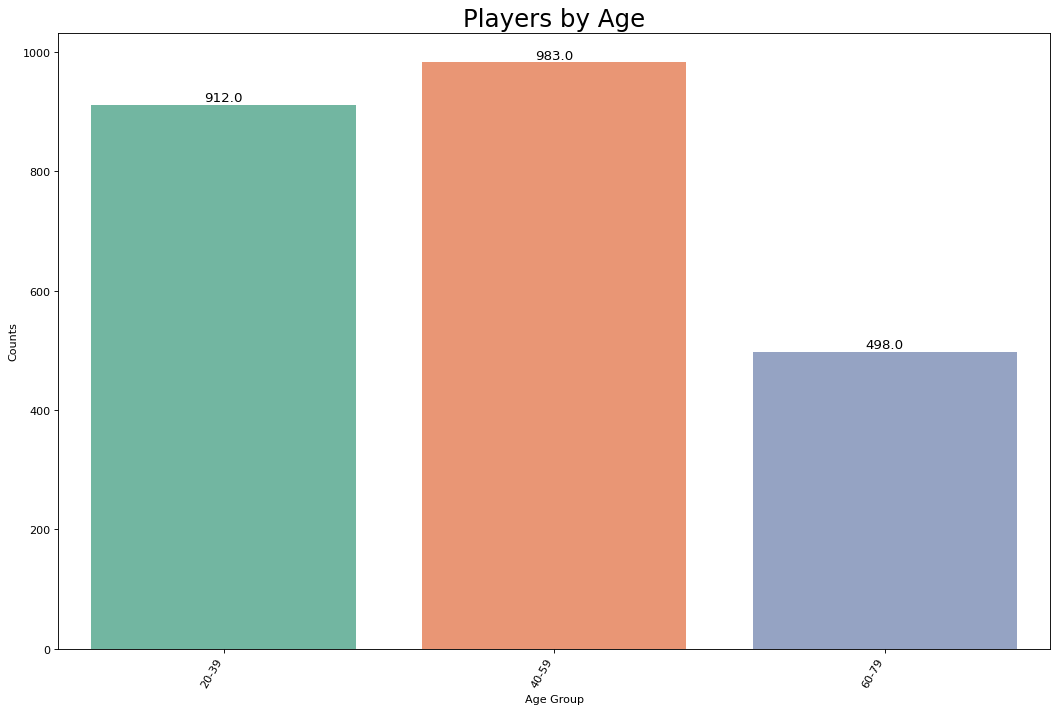

In [23]:




import matplotlib.pyplot as plt
import seaborn as sns
import random

# Import Data
df = users_with_age_grouped

# Prepare Data
n = df.count()
random.seed(100)
c = random.choices(sns.color_palette("Set2"), k=n)

# Plot Bars
plt.figure(figsize=(16, 10), dpi=80)
ax = sns.barplot(x="age_group", y="age_group_count", data=df.toPandas(), palette="Set2")

for i, val in enumerate(df.select("age_group_count").rdd.flatMap(lambda x: x).collect()):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight': 500, 'size': 12})

# Decoration
plt.gca().set_xticklabels(df.select("age_group").rdd.flatMap(lambda x: x).collect(), rotation=60, horizontalalignment='right')
plt.title("Players by Age", fontsize=22)
plt.ylabel('Counts')
plt.xlabel('Age Group')
plt.show()



In [24]:
country_counts = users_with_age.groupBy("country").count().orderBy(f.desc("count")).limit(6)
country_counts.show()

+-------+-----+
|country|count|
+-------+-----+
|     MM|   10|
|     LT|   10|
|     DZ|   10|
|     TC|   10|
|     CI|   10|
|     FI|   10|
+-------+-----+



In [25]:
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:


df

,teamId,total_spending,total_strength
0,28,8.0,2.672721
1,95,89.0,7.717836
2,39,116.0,16.524637
3,32,141.0,7.471528
4,100,160.0,27.269889
5,69,169.0,3.339691
6,70,170.0,15.750538
7,78,176.0,23.110770
8,86,178.0,7.840508
9,2,178.0,4.252460


In [31]:
!pip install pycountry_convert 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pycountry_convert-0.7.2-py3-none-any.whl (13 kB)
  Using cached pprintpp-0.4.0-py2.py3-none-any.whl (16 kB)
  Using cached pycountry-22.3.5.tar.gz (10.1 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pytest_mock-3.10.0-py3-none-any.whl (9.3 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.2/228.2 kB 5.8 MB/s eta 0:00:00
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=7f68e1ddf76248620def7918085bda32fb1789d49d5c1402c54dac1633c6b8fb
  Stored in directory: /root/.cache/pip/wheels/03/57/cc/290c5252ec97a6d78d36479a3c5e5ecc76318afcb241ad9dbe
Successfully built pycountry


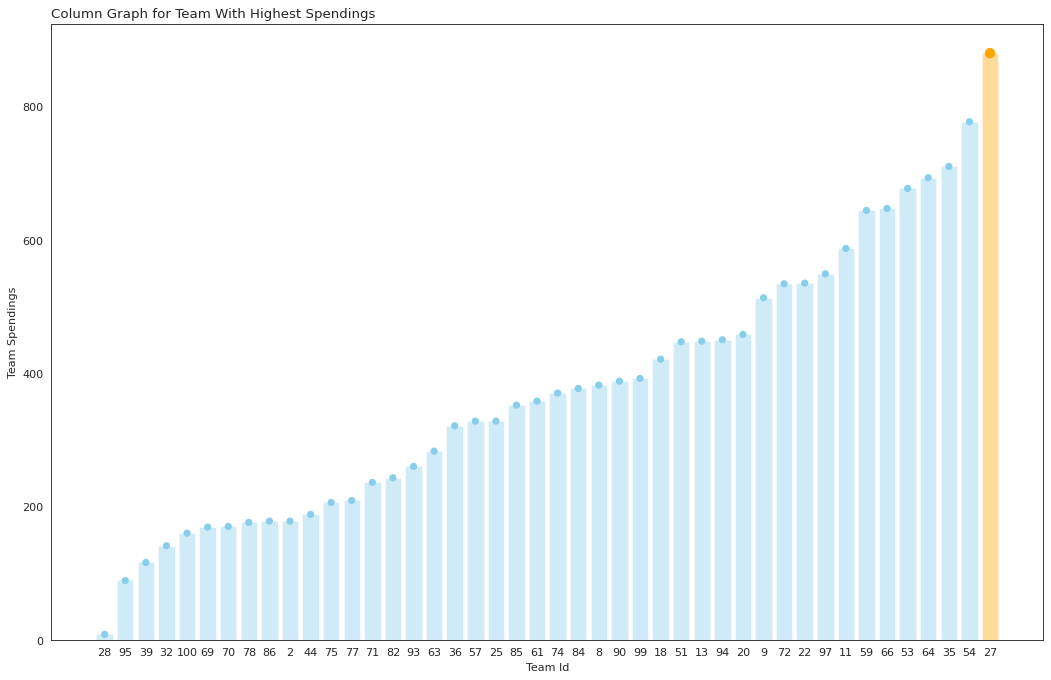

In [32]:



# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Prepare Data
df = team_buying_grouped.toPandas()

# Reorder it based on values:
ordered = df.sort_values(by='total_spending')
my_range = range(1, len(df.index) + 1)

# Create a color if the group is "B"
my_color = np.where(ordered['total_spending'] == ordered['total_spending'].max(), 'orange', 'skyblue')
my_size = np.where(ordered['total_spending'] == ordered['total_spending'].max(), 70, 30)

fig = plt.figure(figsize=(16, 10), dpi=80, facecolor='w', edgecolor='k')

# The bar plot
plt.bar(x=my_range, height=ordered['total_spending'], color=my_color, alpha=0.4)

plt.scatter(my_range, ordered['total_spending'], color=my_color, s=my_size, alpha=1)

# Add title and axis names
plt.xticks(my_range, ordered['teamId'])
plt.title("Column Graph for Team With Highest Spendings", loc='left')
plt.xlabel('Team Id')
plt.ylabel('Team Spendings')

# Show the graph
plt.show()

In [33]:
############# TEAM SPENDING WITH AGE GROUP
team_user_buying = team_buying.alias("team_buying").join(users.alias("users"),\
                           f.col("team_buying.userId") == f.col("users.userId"),"inner")

In [34]:
from pycountry_convert import country_alpha2_to_continent_code, convert_continent_code_to_continent_name
from pyspark.sql.types import StringType
from pyspark.sql.functions import udf, col

def country_to_continent(country_name):
    try:
        country_continent_code = country_alpha2_to_continent_code(country_name)
        country_continent_name = convert_continent_code_to_continent_name(country_continent_code)
        return country_continent_name
    except KeyError:
        return "None"

udf_country_to_continent = udf(country_to_continent, StringType())
team_user_buying = team_user_buying.withColumn("continent", udf_country_to_continent(col("country")))

team_user_buying.show()

+------+-----------+-------------------+-------------------+---------------+------------+-------------------+----+-------------+----+------+-----+-----+-------------------+------+----------+----------+----------+-------+-------------+
|teamId|       name|   teamCreationTime|        teamEndTime|       strength|currentLevel|          timestamp|txId|userSessionId|team|userId|buyId|price|          timestamp|userId|      nick|   twitter|       dob|country|    continent|
+------+-----------+-------------------+-------------------+---------------+------------+-------------------+----+-------------+----+------+-----+-----+-------------------+------+----------+----------+----------+-------+-------------+
|     9|  pDG2bAh8T|2016-06-13 17:39:55|9999-12-31 23:59:59| 0.952175553216|           1|2016-05-26 15:36:54|6004|         5820|   9|  1300|    2|  3.0|2013-12-01 09:30:47|  1300|   2hh0NNM|  @RY1URF2|1998-05-06|     GR|       Europe|
|    35|b3PqpjmZ6TT|2016-06-14 02:08:07|9999-12-31 23:59:59|

In [37]:


from pyspark.sql.functions import format_number
from pyspark.sql.window import Window
from pyspark.sql import functions as f
from pyspark.sql.functions import col

# Calculate total spending per continent
total_spending = team_user_buying.groupby("continent").agg(f.sum('price').alias('total_spending'))

# Calculate statistics and percentage
team_user_buying_stat = team_user_buying.groupby("continent").agg(
    f.sum('price').alias('spending_count'),
    f.mean('price').alias('price_avg'),
    f.min('price').alias('price_min'),
    f.max('price').alias('price_max')
).join(total_spending, on="continent") \
 .withColumn('total',sum(f.col('spending_count')).over(window)).\
  withColumn('Percent',f.col('spending_count')*100/f.col('total'))


team_user_buying_stat = team_user_buying_stat.orderBy(col("spending_count").desc())
team_user_buying_stat.show()




TypeError: ignored

In [38]:
!pip install squarify 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pywaffle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


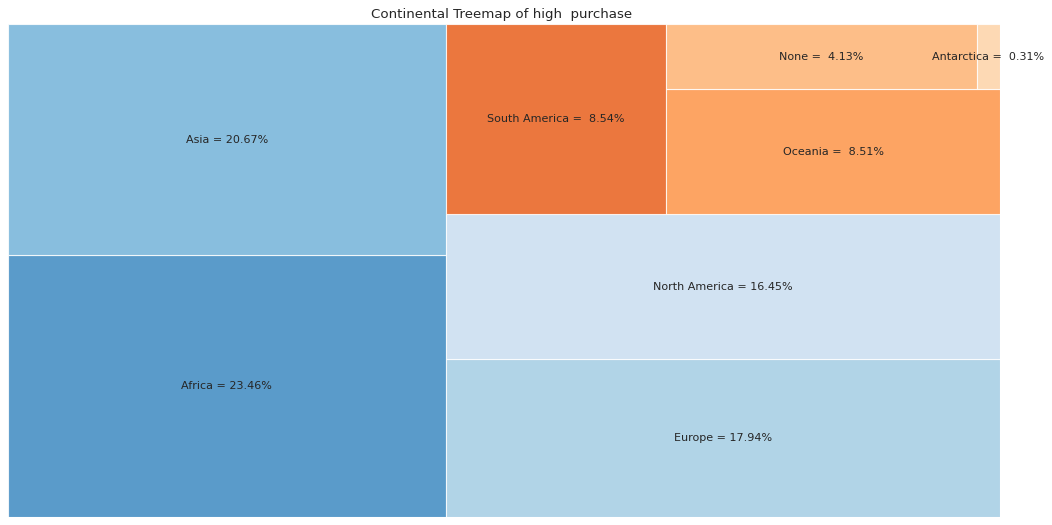

In [ ]:
import matplotlib.pyplot as plt
import squarify    # pip install squarify (algorithm for treemap)
import pandas as pd


# Get dataframe continent & Percent columns as list
labels = list(team_user_buying_stat.toPandas()["continent"])
sizes =  list(team_user_buying_stat.toPandas()["Percent"])

perc = [f'{i/team_user_buying_stat.toPandas()["Percent"].sum()*100:5.2f}%' for i in team_user_buying_stat.toPandas()["Percent"]]
lbl = [f'{el[0]} = {el[1]}' for el in zip(team_user_buying_stat.toPandas()["continent"], perc)]

# select colors
colors = plt.cm.tab20c.colors[:len(labels)]
# plot it
plt.figure(figsize=(16,8), dpi= 80)
squarify.plot(sizes=sizes, label=lbl, color=colors ,alpha=.8 )
plt.title('Continental Treemap of high  purchase ')
plt.axis('off')
plt.show()


In [ ]:
team_user_buying_stat.show()

+-------------+--------------+------------------+---------+---------+--------------+-------+------------------+
|    continent|spending_count|         price_avg|price_min|price_max|total_spending|  total|           Percent|
+-------------+--------------+------------------+---------+---------+--------------+-------+------------------+
|       Africa|        3889.0| 7.282771535580524|      1.0|     20.0|        3889.0|16576.0|23.461631274131275|
|         Asia|        3426.0| 6.704500978473582|      1.0|     20.0|        3426.0|16576.0|20.668436293436294|
|       Europe|        2974.0| 7.548223350253807|      1.0|     20.0|        2974.0|16576.0|17.941602316602317|
|North America|        2726.0| 7.593314763231198|      1.0|     20.0|        2726.0|16576.0|16.445463320463322|
|South America|        1416.0|10.114285714285714|      1.0|     20.0|        1416.0|16576.0| 8.542471042471043|
|      Oceania|        1410.0| 5.802469135802469|      1.0|     20.0|        1410.0|16576.0|  8.50627413

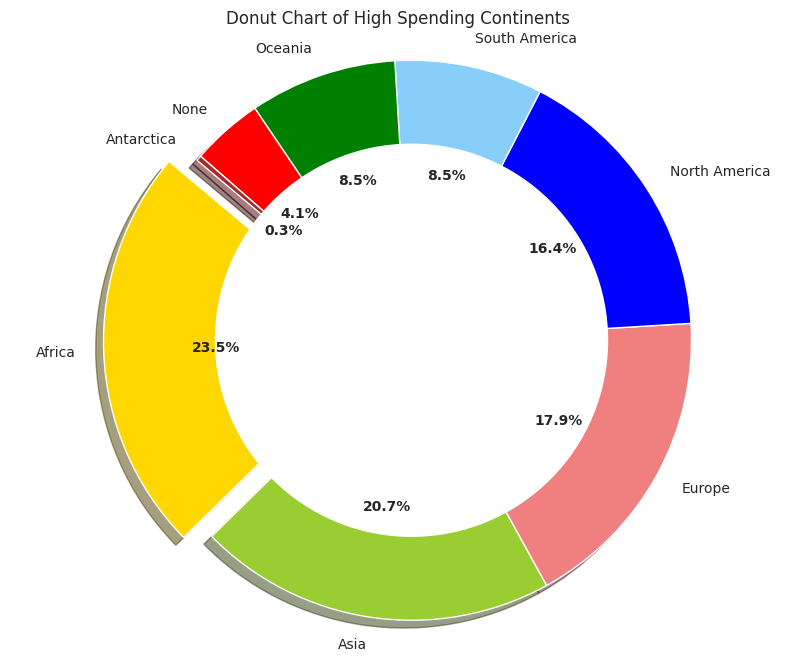

In [ ]:
import matplotlib.pyplot as plt

labels = list(team_user_buying_stat.toPandas()["continent"])
sizes = list(team_user_buying_stat.toPandas()["Percent"])


colors = ['gold', 'yellowgreen', 'lightcoral', 'blue', 'lightskyblue', 'green', 'red', 'brown']

# Plot
fig, ax = plt.subplots(figsize=(10, 8))

wedges, text, autotext = ax.pie(sizes, explode=explode, labels=labels, colors=colors,
                                autopct='%1.1f%%', shadow=True, startangle=140, wedgeprops={'edgecolor': 'white'})

plt.setp(autotext, size=10, weight='bold')
ax.set_title("Donut Chart of High Spending Continents")

# Draw a white circle at the center to create a donut chart
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(center_circle)

plt.axis('equal')
plt.show()


+-------------------+----+-------------+------+------+----+-----------+
|          timestamp|txId|userSessionId|teamId|userId|adId| adCategory|
+-------------------+----+-------------+------+------+----+-----------+
|2016-05-26 15:13:22|5974|         5809|    27|   611|   2|electronics|
|2016-05-26 15:17:24|5976|         5705|    18|  1874|  21|     movies|
|2016-05-26 15:22:52|5978|         5791|    53|  2139|  25|  computers|
|2016-05-26 15:22:57|5973|         5756|    63|   212|  10|    fashion|
|2016-05-26 15:22:58|5980|         5920|     9|  1027|  20|   clothing|
|2016-05-26 15:27:19|5977|         5954|    77|   595|   4|      games|
|2016-05-26 15:28:51|5981|         5674|    54|   770|   6|     movies|
|2016-05-26 15:35:25|5975|         5919|    59|  2133|   3|electronics|
|2016-05-26 15:35:37|5979|         5945|    75|   253|   3|electronics|
|2016-05-26 15:36:38|5972|         5914|    78|  1821|  12|  computers|
|2016-05-26 15:38:42|6000|         5955|    64|  2009|  17|     

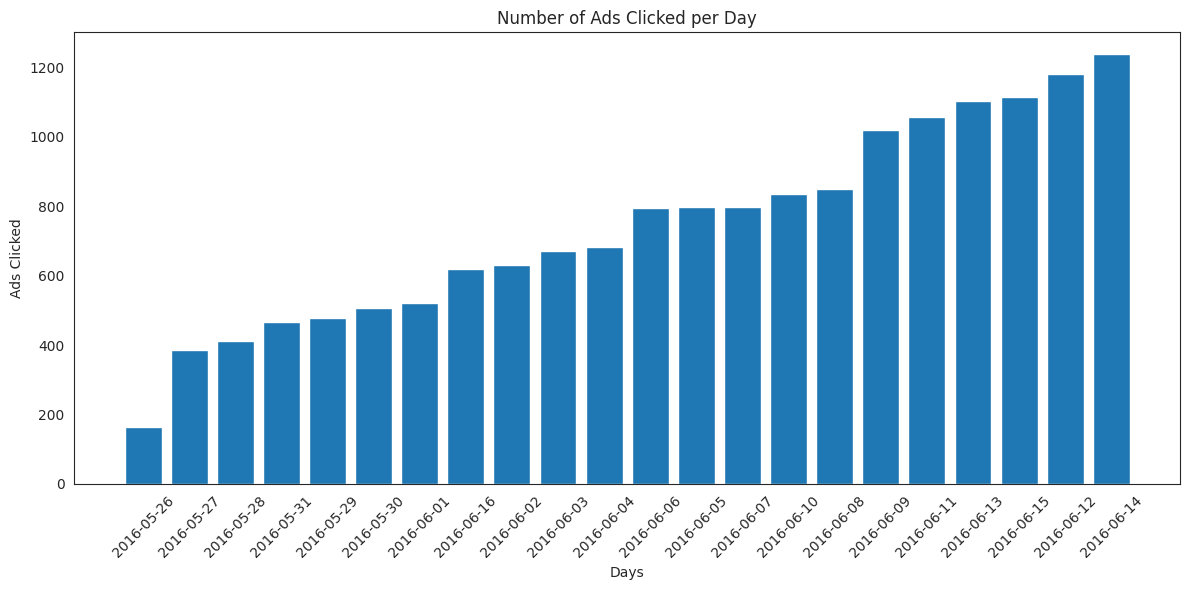

In [39]:
import matplotlib.pyplot as plt
import pyspark.sql.functions as f

adclicks = spark.read.csv("/content/ad-clicks.csv", header=True, inferSchema=True)

adclicks.show()

# Format the timestamp column in the DataFrame and group by the formatted column
adclicks_grouped = adclicks.withColumn("month", f.date_format(adclicks.timestamp, 'yyyy-MM-dd')) \
    .groupBy("month") \
    .count() \
    .orderBy("count")

# Convert the result to Pandas DataFrame for visualization
adclicks_df = adclicks_grouped.toPandas()

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(adclicks_df["month"], adclicks_df["count"])
plt.xlabel("Days")
plt.ylabel("Ads Clicked")
plt.title("Number of Ads Clicked per Day")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


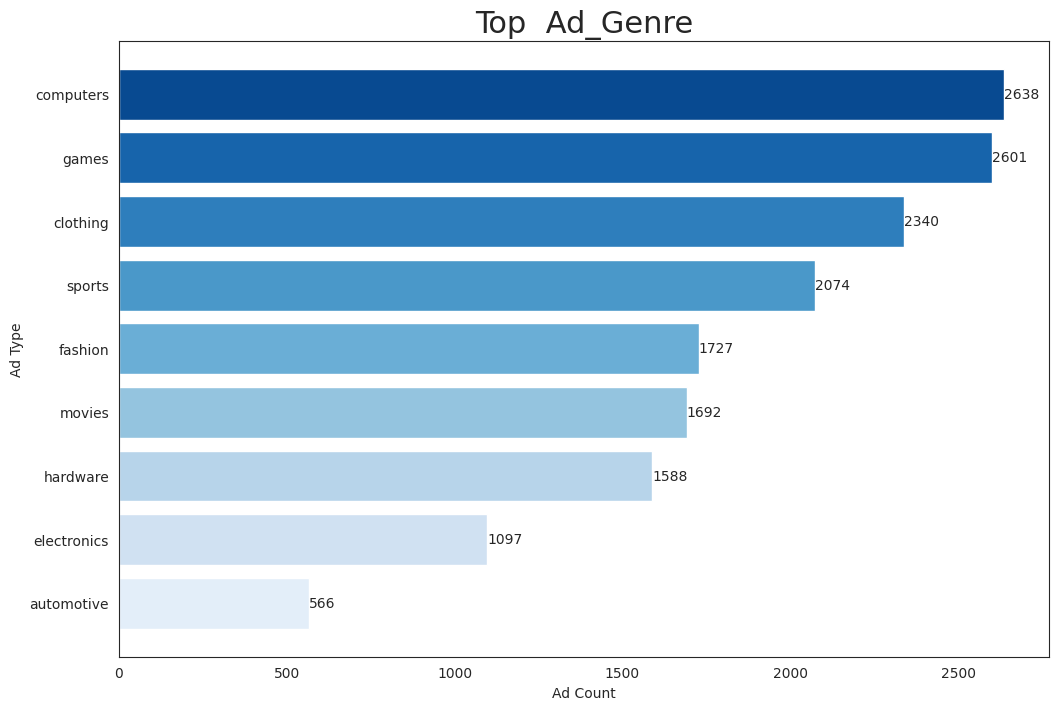

In [ ]:

import seaborn as sns
import pyspark.sql.functions as f
import matplotlib.pyplot as plt

adclicks = spark.read.csv("/content/ad-clicks.csv", header=True, inferSchema=True)
adclicks_stat = adclicks.groupBy("adCategory").agg(f.count("adCategory").alias("count")).orderBy("count").toPandas()

# Generate custom colors
colors = sns.color_palette('Blues', len(adclicks_stat))

# Plot horizontal bars
plt.figure(figsize=(12, 8))
plt.barh(adclicks_stat['adCategory'], adclicks_stat['count'], color=colors)

plt.title("Top  Ad_Genre", fontsize=22)
plt.xlabel('Ad Count')
plt.ylabel('Ad Type')

# Customize tick labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add data labels
for i, count in enumerate(adclicks_stat['count']):
    plt.text(count, i, str(count), va='center')

plt.show()



In [ ]:

################# GET DEVICE TOTAL + PERCENTAGE + INDIVIDUAL PLATFORM

window = Window.rowsBetween(Window.unboundedPreceding,Window.unboundedFollowing)

user_session = spark.read.csv("/content/user-session.csv", header=True, inferSchema=True)
platform_usage_stats = user_session.groupBy("platformType").agg(f.mean("teamLevel").alias("average_rank"), 
                                            f.count("platformType").alias("total_platform_count"))\
                                            .orderBy("average_rank")\
                                            .withColumn('total',sum(f.col('total_platform_count')).over(window))\
                                            .withColumn('Percent',f.col('total_platform_count')*100/f.col('total'))\
                                            .orderBy(f.col("Percent").desc())


platform_usage_stats.show()

+------------+-----------------+--------------------+-----+------------------+
|platformType|     average_rank|total_platform_count|total|           Percent|
+------------+-----------------+--------------------+-----+------------------+
|      iphone|4.349509550851833|                3874| 9250| 41.88108108108108|
|     android|4.388515577275504|                3274| 9250|35.394594594594594|
|     windows|4.364516129032258|                1240| 9250|13.405405405405405|
|       linux|4.182539682539683|                 504| 9250| 5.448648648648649|
|         mac|4.379888268156424|                 358| 9250|3.8702702702702703|
+------------+-----------------+--------------------+-----+------------------+



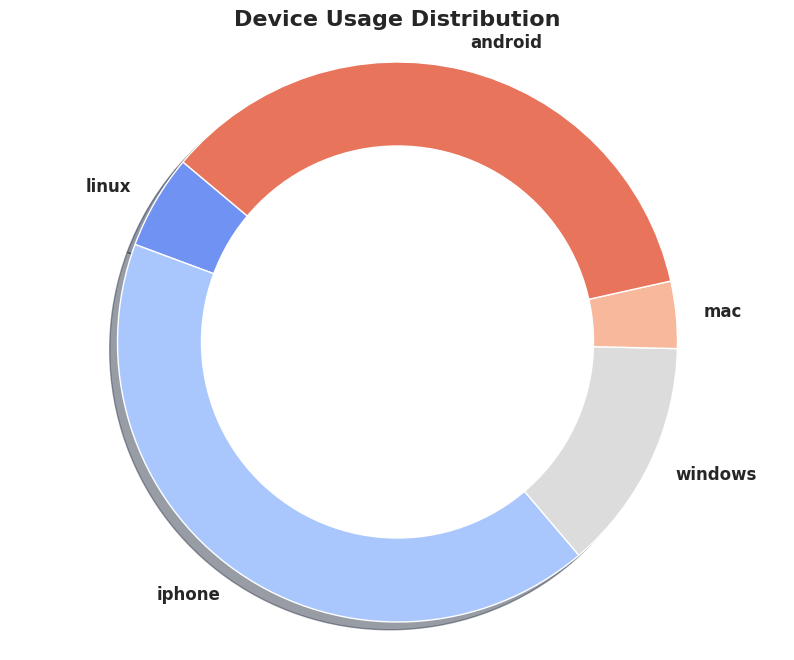

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the data
user_session = spark.read.csv("/content/user-session.csv", header=True, inferSchema=True)

# Compute platform usage statistics
platform_usage_stats = user_session.groupBy("platformType").agg(
    f.mean("teamLevel").alias("average_rank"),
    f.count("platformType").alias("total_platform_count")
).orderBy("average_rank")

# Get labels and sizes
labels = list(platform_usage_stats.toPandas()["platformType"])
sizes = list(platform_usage_stats.toPandas()["total_platform_count"])

# Define custom colors
custom_colors = sns.color_palette("coolwarm", len(labels))

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the pie chart
_, texts, autotexts = ax.pie(sizes, labels=labels, colors=custom_colors,
                             autopct='%1.1f%%', shadow=True, startangle=140)

# Customize text and autotext appearance
for text in texts:
    text.set_fontsize(12)
    text.set_fontweight("bold")

for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_fontweight("bold")
    autotext.set_color("white")

# Add a circle in the center
my_circle = plt.Circle((0, 0), 0.7, color="white")
ax.add_artist(my_circle)

# Set equal aspect ratio
ax.axis('equal')

plt.title("Device Usage Distribution", fontsize=16, fontweight="bold")

plt.show()




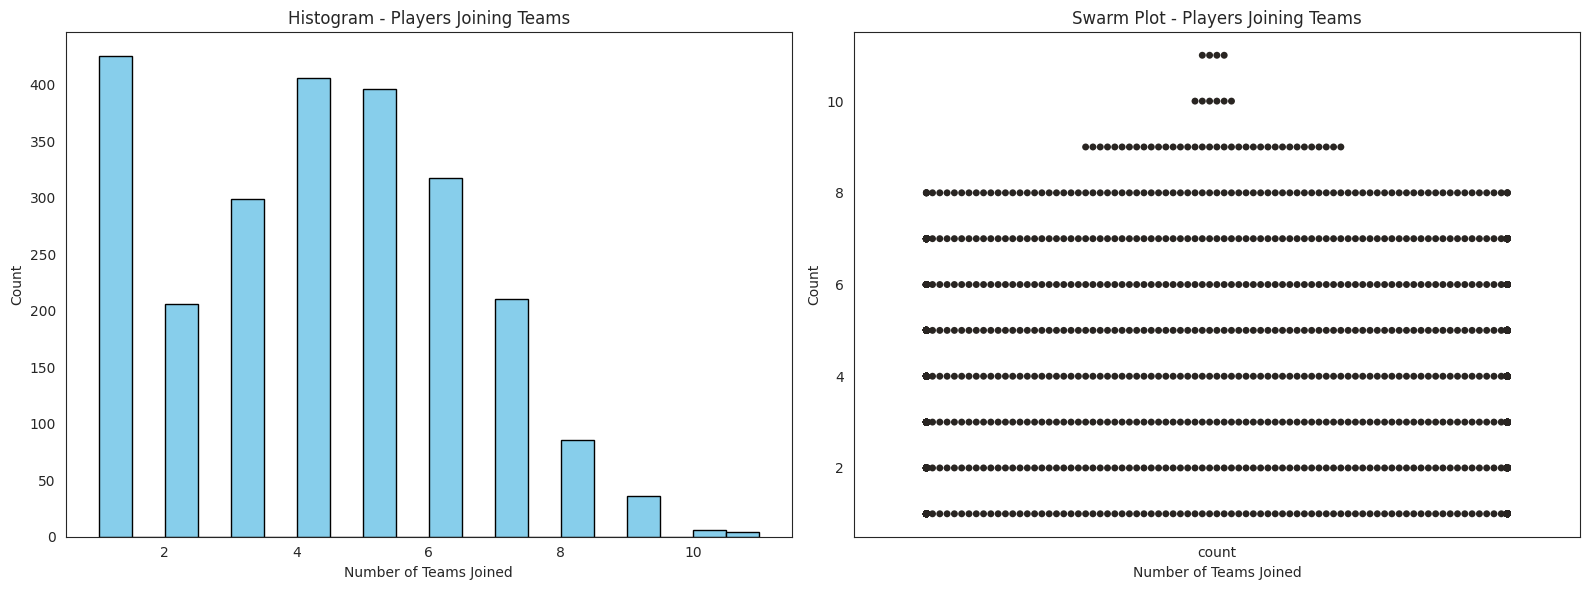

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

team_assigments = spark.read.csv("/content/team-assignments.csv", header=True, inferSchema=True)

team_assigment_stats = team_assigments.groupBy("userId").agg(f.count("userId").alias("count")).select("count", "userId").orderBy("count")
x = team_assigment_stats.select("count").toPandas()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram
axes[0].hist(x['count'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_xlabel('Number of Teams Joined')
axes[0].set_ylabel('Count')
axes[0].set_title('Histogram - Players Joining Teams')

# Swarm plot
sns.swarmplot(data=x, ax=axes[1], color='orange')
axes[1].set_xlabel('Number of Teams Joined')
axes[1].set_ylabel('Count')
axes[1].set_title('Swarm Plot - Players Joining Teams')

plt.tight_layout()
plt.show()


In [41]:
############# CORR
from pyspark.sql import functions as f

team = spark.read.csv("/content/team.csv", header=True, inferSchema=True)
buyclicks = spark.read.csv("/content/buy-clicks.csv", header=True, inferSchema=True)


team_buying = team.alias("teamdf").join(buyclicks.alias("buyclicks"),\
                            f.col("teamdf.teamId") == f.col("buyclicks.team"),"inner")



########## HISTOGRAM OF SPENDING COUNT HOW MUCH SPENDING IS DISTRIBUTED && CORRELATION

# team_buying_df.groupBy("teamId").sum("price", "strength").orderBy("sum(price)").toPandas().hist(column = "sum(price)")


team_buying_grouped = team_buying.groupBy("teamId").sum("price", "strength")\
         .select('teamId', f.col('sum(price)').alias('total_spending'), f.col('sum(strength)').alias('total_strength'))\
         .orderBy("sum(price)")

team_buying.stat.corr("price","strength")
# team_buying_df_grouped.show()

-0.06938790495270436

# **Machine Learning**

In [9]:
################ CLUSTERING ANALYSIS

# Utility functions for Spark Cluster Analysis Hands-On
#
#
from itertools import cycle, islice
from math import sqrt
from numpy import array
from pandas.plotting import parallel_coordinates
from pyspark.ml.clustering import KMeans as KM
from pyspark.mllib.linalg import DenseVector
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def computeCost(featuresAndPrediction, model):
    allClusterCenters = [DenseVector(c) for c in model.clusterCenters()]
    arrayCollection   = featuresAndPrediction.rdd.map(array)

    def error(point, predictedCluster):
        center = allClusterCenters[predictedCluster]
        z      = point - center
        return sqrt((z*z).sum())
    
    return arrayCollection.map(lambda row: error(row[0], row[1])).reduce(lambda x, y: x + y)


def elbow(elbowset, clusters):
    wsseList = []    
    for k in clusters:
        print("Training for cluster size {} ".format(k))
        kmeans = KM(k=k, seed=1)
        model = kmeans.fit(elbowset)
        transformed = model.transform(elbowset)
        featuresAndPrediction = transformed.select("features", "prediction")

        W = computeCost(featuresAndPrediction, model)
        print("......................WSSE = {} ".format(W))

        wsseList.append(W)
    return wsseList

def elbow_plot(wsseList, clusters):
    wsseDF = pd.DataFrame({'WSSE': wsseList, 'k': clusters})
    wsseDF.plot(y='WSSE', x='k', figsize=(15, 10), grid=True, marker='o')

def pd_centers(featuresUsed, centers):
    colNames = list(featuresUsed)
    colNames.append('prediction')

    # Zip with a column called 'prediction' (index)
    Z = [np.append(A, index) for index, A in enumerate(centers)]

    # Convert to pandas for plotting
    P = pd.DataFrame(Z, columns=colNames)
    P['prediction'] = P['prediction'].astype(int)
    return P

def parallel_plot(data, P):
    my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(P)))
    plt.figure(figsize=(15, 8)).gca().axes.set_ylim([-3, +3])
    parallel_coordinates(data, 'prediction', color=my_colors, marker='o')



In [12]:
combined_data= spark.read.csv("/content/combined-data.csv", header=True, inferSchema=True)

combined_data

DataFrame[userId: int, userSessionId: int, teamLevel: int, platformType: string, count_gameclicks: int, count_hits: int, count_buyId: string, avg_price: string]

In [13]:
combined_data.count()
combined_data.na.drop().count()





4619

In [14]:
combined_data.columns

['userId',
 'userSessionId',
 'teamLevel',
 'platformType',
 'count_gameclicks',
 'count_hits',
 'count_buyId',
 'avg_price']

In [16]:
# K-MEANS CLUSTERING
ad_click = spark.read.csv("/content/ad-clicks.csv", header=True, inferSchema=True)
buy_click = spark.read.csv("/content/buy-clicks.csv", header=True, inferSchema=True)
game_click = spark.read.csv("/content/game-clicks.csv", header=True, inferSchema=True)
level_events = spark.read.csv("/content/level-events.csv", header=True, inferSchema=True)
team_assignments = spark.read.csv("/content/team-assignments.csv", header=True, inferSchema=True)
team = spark.read.csv("/content/team.csv", header=True, inferSchema=True)
users = spark.read.csv("/content/users.csv", header=True, inferSchema=True)
users_session = spark.read.csv("/content/user-session.csv", header=True, inferSchema=True)











In [21]:
# JOIN TABLES
from pyspark.sql import functions as f

whole_dataset = team_assignments.alias("team_assignment").join(users.alias("users"),\
                           f.col("team_assignment.userId") == f.col("users.userId"),"inner")\
                           .join(team.alias("team"), f.col("team.teamId") == f.col("team"))\
                           .join(users_session.alias("users_session"), f.col("users_session.userId") == f.col("users.userId"))\
                           .join(game_click.alias("game_click"), f.col("game_click.userId") == f.col("users.userId"))\
                           .join(ad_click.alias("ad_click"), f.col("ad_click.userId") == f.col("users.userId"))\
                           .join(buy_click.alias("buy_click"), f.col("buy_click.userId") == f.col("users.userId"))\
                           .select("team_assignment.timestamp", "team_assignment.timestamp", 
                                   "users.userId", "users.nick", "users.twitter","users.country","users.dob",
                                   "team.teamId","team.teamCreationTime", "team.teamEndTime", "team.strength","team.currentLevel",
                                   "users_session.timestamp","users_session.timestamp", "users_session.sessionType","users_session.teamLevel","users_session.platformType",
                                   "game_click.timestamp", "game_click.isHit",
                                   "ad_click.adId", "ad_click.adCategory",
                                   "buy_click.txId","buy_click.price")
                          

In [22]:
from pyspark.sql.functions import format_number

# Select distinct columns from the whole_dataset DataFrame
distinct_dataset = whole_dataset.select('strength', 'teamLevel', 'isHit', 'price').distinct()

distinct_dataset.show()





+---------------+---------+-----+-----+
|       strength|teamLevel|isHit|price|
+---------------+---------+-----+-----+
|  0.34348462196|        3|    1|  2.0|
| 0.141376627543|        6|    1|  3.0|
|  0.13358763615|        5|    1|  2.0|
| 0.350676528613|        3|    0|  3.0|
| 0.393763462002|        3|    0|  5.0|
| 0.642122051019|        4|    0| 10.0|
| 0.767191204445|        3|    0|  1.0|
|0.0859900712952|        7|    1| 20.0|
| 0.132214897776|        1|    0|  3.0|
|   0.6086527331|        6|    1| 20.0|
|  0.47269158141|        2|    0|  1.0|
| 0.718462485619|        7|    1|  2.0|
| 0.132214897776|        5|    1| 20.0|
|   0.6086527331|        4|    0|  3.0|
|   0.6086527331|        4|    0|  2.0|
|   0.6086527331|        1|    0|  1.0|
| 0.276723269022|        4|    1| 20.0|
| 0.668180373589|        1|    0|  2.0|
| 0.701621474289|        3|    1| 20.0|
|0.0495931577569|        5|    0| 10.0|
+---------------+---------+-----+-----+
only showing top 20 rows



In [24]:
import pyspark.sql.functions as f
from pyspark.sql import Window

# Define a window specification to cover all rows
window = Window.rowsBetween(Window.unboundedPreceding, Window.unboundedFollowing)

# Read the combined data from a CSV file
combined_data = spark.read.csv("/content/combined-data.csv", header=True, inferSchema=True)
combined_data_na_removed = combined_data.na.drop()

# Calculate 'total' column as the sum of 'avg_price' over all rows
combined_data_hitter = combined_data.withColumn('total', f.sum(f.col('avg_price')).over(window))

# Create 'spender' column based on a condition
combined_data_hitter = combined_data_hitter.withColumn("spender", f.when(f.col("avg_price") > 5, 1).otherwise(0))

# Group by 'userId' and calculate aggregations
grouped_userId_combined_data = combined_data_hitter.groupby("userId") \
    .agg(
        f.sum("count_gameclicks").alias('count_gameclicks_total'),
        f.sum("count_hits").alias("count_hits_total"),
        f.sum("avg_price").alias("avg_price_total")
    ) \
    .withColumn('Percent', f.col('count_hits_total') * 100 / f.col('count_gameclicks_total'))

# Create 'hitter' column based on a condition
grouped_userId_combined_data = grouped_userId_combined_data.withColumn("hitter", f.when(f.col("Percent") > 10, 1).otherwise(0))

# Perform an inner join between combined_data_hitter and grouped_userId_combined_data
combined_grouped = combined_data_hitter.alias("combined_data_hitter") \
    .join(
        grouped_userId_combined_data.alias("grouped_userId_combined_data"),
        f.col("combined_data_hitter.userId") == f.col("grouped_userId_combined_data.userId"),
        "inner"
    )

# Show the resulting DataFrame
combined_grouped.show()


+------+-------------+---------+------------+----------------+----------+-----------+---------+------------------+-------+------+----------------------+----------------+---------------+------------------+------+
|userId|userSessionId|teamLevel|platformType|count_gameclicks|count_hits|count_buyId|avg_price|             total|spender|userId|count_gameclicks_total|count_hits_total|avg_price_total|           Percent|hitter|
+------+-------------+---------+------------+----------------+----------+-----------+---------+------------------+-------+------+----------------------+----------------+---------------+------------------+------+
|   812|         5648|        1|     android|              69|         8|       NULL|     NULL|10179.410000000002|      0|   812|                   669|              74|           null|11.061285500747385|     1|
|  1658|         5649|        1|      iphone|              31|         5|       NULL|     NULL|10179.410000000002|      0|  1658|                   403|

In [25]:

from pyspark.ml.feature import StringIndexer

# Create an instance of StringIndexer
indexer = StringIndexer(inputCol='platformType', outputCol='platformType_indexed')

# Fit the indexer model to the data
indexer_model = indexer.fit(combined_grouped)

# Transform the data by adding the indexed column
combined_grouped_indexed = indexer_model.transform(combined_grouped)

# Show the transformed data
combined_grouped_indexed.show()



+------+-------------+---------+------------+----------------+----------+-----------+---------+------------------+-------+------+----------------------+----------------+---------------+------------------+------+--------------------+
|userId|userSessionId|teamLevel|platformType|count_gameclicks|count_hits|count_buyId|avg_price|             total|spender|userId|count_gameclicks_total|count_hits_total|avg_price_total|           Percent|hitter|platformType_indexed|
+------+-------------+---------+------------+----------------+----------+-----------+---------+------------------+-------+------+----------------------+----------------+---------------+------------------+------+--------------------+
|   812|         5648|        1|     android|              69|         8|       NULL|     NULL|10179.410000000002|      0|   812|                   669|              74|           null|11.061285500747385|     1|                 1.0|
|  1658|         5649|        1|      iphone|              31|      

In [27]:
from pyspark.sql.functions import format_number

# Fill NA in avg_price_total with 0
combined_grouped_indexed = combined_grouped_indexed.withColumn('avg_price_total', format_number(combined_grouped_indexed['avg_price_total'].cast('float'), 2))
combined_grouped_indexed = combined_grouped_indexed.fillna({'avg_price_total': '0'})

combined_grouped_indexed.show()


+------+-------------+---------+------------+----------------+----------+-----------+---------+------------------+-------+------+----------------------+----------------+---------------+------------------+------+--------------------+
|userId|userSessionId|teamLevel|platformType|count_gameclicks|count_hits|count_buyId|avg_price|             total|spender|userId|count_gameclicks_total|count_hits_total|avg_price_total|           Percent|hitter|platformType_indexed|
+------+-------------+---------+------------+----------------+----------+-----------+---------+------------------+-------+------+----------------------+----------------+---------------+------------------+------+--------------------+
|   812|         5648|        1|     android|              69|         8|       NULL|     NULL|10179.410000000002|      0|   812|                   669|              74|           0.00|11.061285500747385|     1|                 1.0|
|  1658|         5649|        1|      iphone|              31|      

In [28]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler

# Define the features to be used
featuresUsed = [
    'Percent',
    'teamLevel',
    'count_gameclicks_total',
    'count_hits_total',
    'platformType_indexed'
]

# Create a VectorAssembler to combine the selected features into a single vector column
assembler = VectorAssembler(inputCols=featuresUsed, outputCol='features')
assembled = assembler.transform(combined_grouped_indexed)

# Split the data into training and test sets in an 80:20 ratio
combined_grouped_data_train, combined_grouped_data_test = assembled.randomSplit([0.8, 0.2], seed=17)

# Show the training data
combined_grouped_data_train.show()



+------+-------------+---------+------------+----------------+----------+-----------+---------+------------------+-------+------+----------------------+----------------+---------------+------------------+------+--------------------+--------------------+
|userId|userSessionId|teamLevel|platformType|count_gameclicks|count_hits|count_buyId|avg_price|             total|spender|userId|count_gameclicks_total|count_hits_total|avg_price_total|           Percent|hitter|platformType_indexed|            features|
+------+-------------+---------+------------+----------------+----------+-----------+---------+------------------+-------+------+----------------------+----------------+---------------+------------------+------+--------------------+--------------------+
|     0|        24943|        2|      iphone|             353|        35|       NULL|     NULL|10179.410000000002|      0|     0|                  1240|             124|           0.00|              10.0|     0|                 0.0|[10.0,

In [39]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

silhouette_scores = []
evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='features',
                                metricName='silhouette', distanceMeasure='squaredEuclidean')

for i in range(2, 10):
    kmeans = KMeans(featuresCol='features', k=i)
    kmeans_model = kmeans.fit(combined_grouped_data_train)
    predictions = kmeans_model.transform(combined_grouped_data_train)
    score = evaluator.evaluate(predictions)
    silhouette_scores.append(score)
    print("Silhouette Score for k =", i, ":", score)


Silhouette Score for k = 2 : 0.8826632454216913
Silhouette Score for k = 3 : 0.6843048808940346
Silhouette Score for k = 4 : 0.7154837804062976
Silhouette Score for k = 5 : 0.7259475589964668
Silhouette Score for k = 6 : 0.6987393745940615
Silhouette Score for k = 7 : 0.6962419983939117
Silhouette Score for k = 8 : 0.7002627033006884
Silhouette Score for k = 9 : 0.6755340074334529


Text(0, 0.5, 'cost')

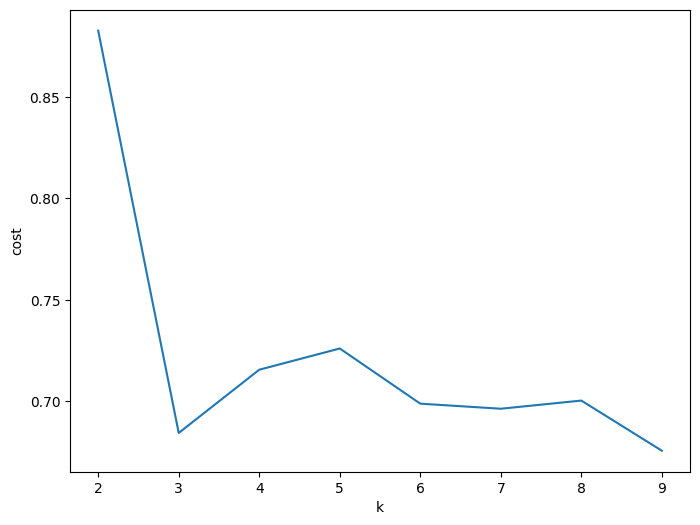

In [31]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,10),silhouette_scores)
ax.set_xlabel('k')
ax.set_ylabel('cost')

In [42]:
final_clustering=KMeans(featuresCol='standardized', k=3)
KMeans_fit=KMeans_algo.fit(combined_grouped_data_test)
clusters_output=KMeans_fit.transform(combined_grouped_data_test)
clusters_output.show()

+------+-------------+---------+------------+----------------+----------+-----------+---------+------------------+-------+------+----------------------+----------------+---------------+------------------+------+--------------------+--------------------+----------+
|userId|userSessionId|teamLevel|platformType|count_gameclicks|count_hits|count_buyId|avg_price|             total|spender|userId|count_gameclicks_total|count_hits_total|avg_price_total|           Percent|hitter|platformType_indexed|            features|prediction|
+------+-------------+---------+------------+----------------+----------+-----------+---------+------------------+-------+------+----------------------+----------------+---------------+------------------+------+--------------------+--------------------+----------+
|     0|        23473|        1|      iphone|             237|        28|       NULL|     NULL|10179.410000000002|      0|     0|                  1240|             124|           0.00|              10.0| 

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

df = clusters_output.toPandas()
label = df.prediction.tolist()
u_labels = np.unique(label)

filtered_df = df[df['prediction'] == 1]

plt.rcParams["figure.figsize"] = (14, 8)
plt.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(df.avg_price_total, df.count_hits_total, df.teamLevel, c=df.prediction, s=150, cmap='rainbow')

scatter = ax.scatter(df.avg_price_total, df.count_hits_total, df.teamLevel, c=df.prediction, s=150, cmap='rainbow')
legend1 = ax.legend(*scatter.legend_elements(), loc="upper left", title="Classes")
ax.add_artist(legend1)

ax.legend(loc='upper left')

ax.set_xlabel('Price Total', fontsize=20, labelpad=10)
ax.set_ylabel('Total Hit Counts', fontsize=20, rotation=150, labelpad=10)
ax.set_zlabel('Team Level', fontsize=20, rotation=60, labelpad=15)

plt.show()



<Figure size 1400x800 with 0 Axes>

In [45]:
clusters_output.show()

+------+-------------+---------+------------+----------------+----------+-----------+---------+------------------+-------+------+----------------------+----------------+---------------+------------------+------+--------------------+--------------------+----------+
|userId|userSessionId|teamLevel|platformType|count_gameclicks|count_hits|count_buyId|avg_price|             total|spender|userId|count_gameclicks_total|count_hits_total|avg_price_total|           Percent|hitter|platformType_indexed|            features|prediction|
+------+-------------+---------+------------+----------------+----------+-----------+---------+------------------+-------+------+----------------------+----------------+---------------+------------------+------+--------------------+--------------------+----------+
|     0|        23473|        1|      iphone|             237|        28|       NULL|     NULL|10179.410000000002|      0|     0|                  1240|             124|           0.00|              10.0| 

Training for cluster size 5 
......................WSSE = 7402.3832302379515 
Training for cluster size 6 
......................WSSE = 7048.319723977783 
Training for cluster size 7 
......................WSSE = 7011.454831986224 
Training for cluster size 8 
......................WSSE = 6648.859149339848 
Training for cluster size 9 
......................WSSE = 6363.240529222316 
Training for cluster size 10 
......................WSSE = 5828.245776956924 
Training for cluster size 11 
......................WSSE = 5822.26276530395 
Training for cluster size 12 
......................WSSE = 5596.8897051554895 
Training for cluster size 13 
......................WSSE = 5466.591940879645 
Training for cluster size 14 
......................WSSE = 5379.907360972269 
Training for cluster size 15 
......................WSSE = 5257.270145903736 
Training for cluster size 16 
......................WSSE = 5168.471260452605 
Training for cluster size 17 
......................WSSE = 5086.5263

,platformType_indexed,teamLevel,hitter,spender,count_gameclicks_total,avg_price_total,count_hits_total
0,-0.159078,-0.036365,0.560036,-0.372151,-0.217321,-0.160085,-0.179910
1,0.147503,-0.453602,0.287198,-0.137452,2.530351,-0.054809,2.514082
2,2.360239,0.004245,-0.201248,-0.292081,-0.246001,-0.399195,-0.261021
3,-0.751559,0.301983,0.390343,2.561660,-0.209781,1.790676,-0.104333
4,-0.195034,0.118900,-1.785211,-0.358450,-0.328588,-0.454844,-0.479037


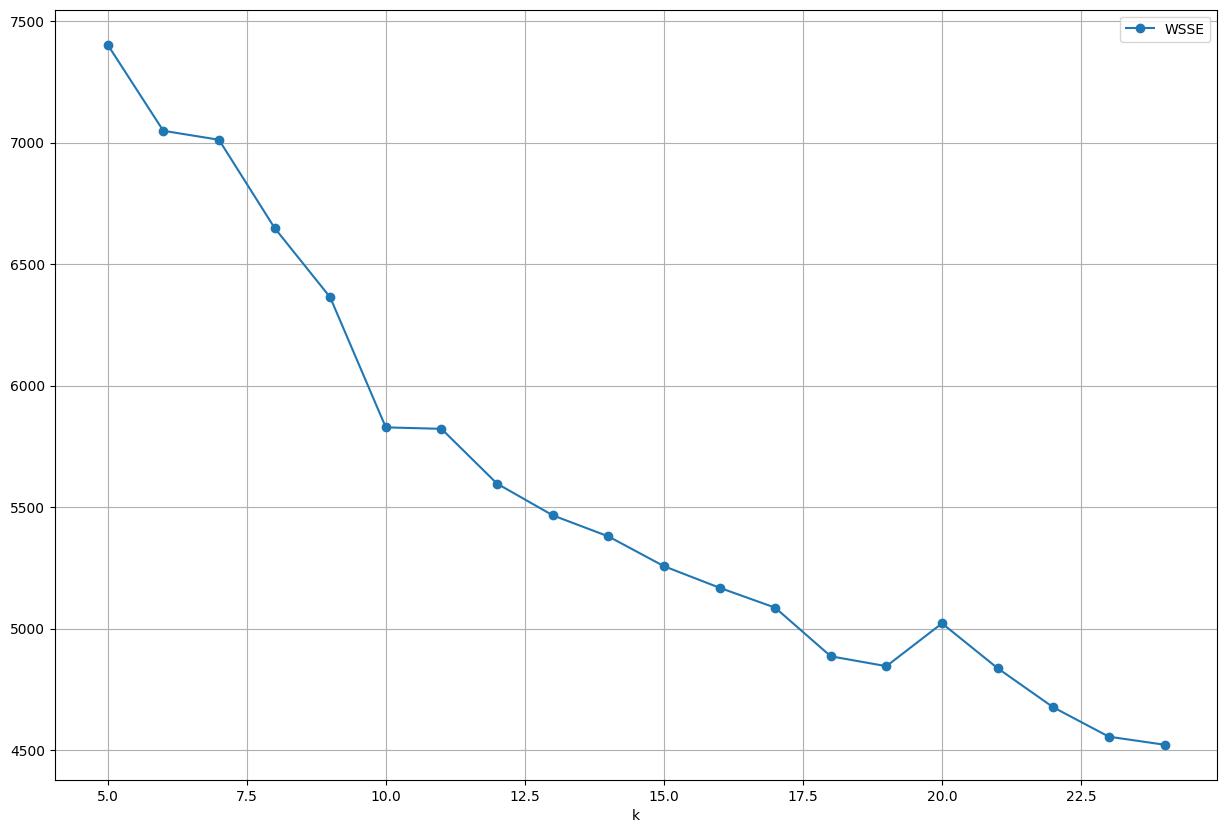

In [52]:
#################### KMEANS 
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import StandardScaler
from pyspark.ml.clustering import KMeans
import pandas as pd

# Select the features to be used for clustering
featuresUsed = ["platformType_indexed", "teamLevel", "hitter", "spender", "count_gameclicks_total", "avg_price_total", "count_hits_total"]

# Convert 'avg_price_total' column to a numeric data type
combined_grouped_indexed = combined_grouped_indexed.withColumn("avg_price_total", combined_grouped_indexed["avg_price_total"].cast("double"))

# Assemble the features into a vector column
assembler = VectorAssembler(inputCols=featuresUsed, outputCol="features_unscaled")
assembled_feature = assembler.transform(combined_grouped_indexed)

# Scale the data to standardize different units
scaler = StandardScaler(inputCol="features_unscaled", outputCol="features", withStd=True, withMean=True)
scalerModel = scaler.fit(assembled_feature)
scaledData = scalerModel.transform(assembled_feature)

elbowset = scaledData.select("features", "platformType_indexed", "count_gameclicks_total", "avg_price_total", "count_hits_total", "teamLevel")
clusters = range(5, 25)

wsseList = elbow(elbowset, clusters)

# Plot the elbow method
elbow_plot(wsseList, clusters)

# Select the feature columns
scaledDataFeat = scaledData.select("features", "teamLevel", "platformType_indexed", "count_gameclicks_total", "avg_price_total", "count_hits_total", "spender", "hitter")
scaledDataFeat.persist()

# Train the KMeans model with 5 clusters
kmeans = KMeans(k=5, seed=1)
model = kmeans.fit(scaledDataFeat)
transformed = model.transform(scaledDataFeat)

# Get cluster centroids
centers = model.clusterCenters()

# Convert cluster centroids to pandas DataFrame
P = pd_centers(featuresUsed, centers)
P.head()





In [54]:
transformed.show()
centers

+--------------------+---------+--------------------+----------------------+---------------+----------------+-------+------+----------+
|            features|teamLevel|platformType_indexed|count_gameclicks_total|avg_price_total|count_hits_total|spender|hitter|prediction|
+--------------------+---------+--------------------+----------------------+---------------+----------------+-------+------+----------+
|[0.05614147219518...|        1|                 1.0|                   669|            0.0|              74|      0|     1|         0|
|[-0.8902726156499...|        1|                 0.0|                   403|           37.5|              58|      0|     1|         0|
|[-0.8902726156499...|        1|                 0.0|                   289|            0.0|              25|      0|     0|         4|
|[0.05614147219518...|        1|                 1.0|                   371|           13.0|              41|      0|     1|         0|
|[0.05614147219518...|        1|                

[array([-0.15907806, -0.03636503,  0.56003647, -0.37215053, -0.21732124,
        -0.1600847 , -0.17990985]),
 array([ 0.14750323, -0.45360234,  0.28719822, -0.13745186,  2.53035053,
        -0.0548085 ,  2.51408176]),
 array([ 2.3602386 ,  0.00424472, -0.20124819, -0.29208106, -0.24600105,
        -0.39919541, -0.26102093]),
 array([-0.75155886,  0.30198308,  0.3903432 ,  2.56166   , -0.20978065,
         1.79067607, -0.10433334]),
 array([-0.1950345 ,  0.11889969, -1.78521144, -0.35844995, -0.32858808,
        -0.45484407, -0.47903675])]

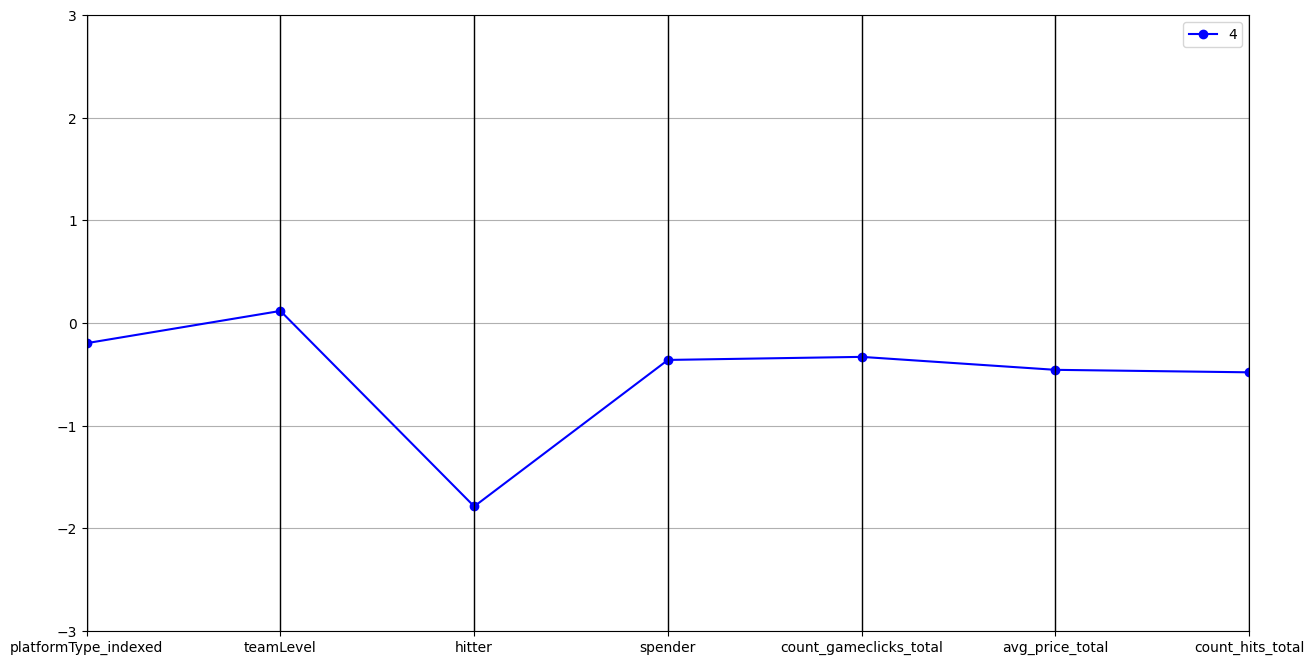

In [56]:
# Convert cluster centroids to pandas DataFrame
P = pd_centers(featuresUsed, centers)

# Add 'prediction' column to DataFrame P
predictions = model.transform(scaledDataFeat)
P['prediction'] = predictions.select('prediction').toPandas()

# Plot parallel coordinates for clusters with 'hitter' value less than -0.5
parallel_plot(P[P['hitter'] < -0.5], P)

In [57]:
from logging import Handler
####### PLOT K MEANS
import numpy as np 
import matplotlib.pyplot as plt


df = transformed.toPandas()

label = df.prediction.tolist()

u_labels = np.unique(label)



filtereddf = df[df['prediction'] == 1]



##################### ATTEMPT 1 AT PLOTTING
# https://rsandstroem.github.io/sparkkmeans.html

# threedee = plt.figure(figsize=(12,10)).gca(projection='3d')
# threedee.scatter(df.avg_price_total, df.count_hits_total, df.teamLevel  , c=df.prediction)
# threedee.set_xlabel('teamLevel')
# threedee.set_ylabel('count_hits_total')
# threedee.set_zlabel('avg_price_total')

# print(u_labels)
# plt.legend(labels = u_labels, bbox_to_anchor=(1.05, 1), loc=2, )
# plt.show()



###################### ATTEMPT 2 
# https://stackoverflow.com/questions/69887186/legends-not-appearing-in-3d-plot



plt.rcParams["figure.figsize"]=(14,8)
plt.rcParams['legend.fontsize'] = 10
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(df.avg_price_total, df.count_hits_total, df.platformType_indexed  , c=df.prediction, s =150,cmap='rainbow')


scatter = ax.scatter(df.avg_price_total, df.count_hits_total, df.platformType_indexed, c=df.prediction, s =150,cmap='rainbow')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="Classes")
ax.add_artist(legend1)

ax.legend(loc = 'upper left')

ax.set_xlabel('Price Total',fontsize=20,labelpad=10)
ax.set_ylabel('Total Hit Counts', fontsize=20, rotation=150,labelpad=10)
ax.set_zlabel('Team Level', fontsize=20, rotation=60,labelpad=15)









Text(0.5, 0, 'Team Level')

<Figure size 1400x800 with 0 Axes>

In [58]:
from pyspark.ml.feature import VectorAssembler

# Create an assembler object
featuresUsed = ["avg_price_total",
 'teamLevel',
"platformType_indexed"
 ]



assembler = VectorAssembler(inputCols=featuresUsed,  outputCol='features')
assembled = assembler.transform(combined_grouped_indexed)


# assembled  = assembled.select(featuresUsed)
# Split into training and test sets in a 80:20 ratio
combined_grouped_data_train, combined_grouped_data_test = assembled.randomSplit([0.8, 0.2], seed=17)



# Check the resulting column
combined_grouped_data_train.show(5, truncate=False)




+------+-------------+---------+------------+----------------+----------+-----------+---------+------------------+-------+------+----------------------+----------------+---------------+-----------------+------+--------------------+-------------+
|userId|userSessionId|teamLevel|platformType|count_gameclicks|count_hits|count_buyId|avg_price|total             |spender|userId|count_gameclicks_total|count_hits_total|avg_price_total|Percent          |hitter|platformType_indexed|features     |
+------+-------------+---------+------------+----------------+----------+-----------+---------+------------------+-------+------+----------------------+----------------+---------------+-----------------+------+--------------------+-------------+
|0     |24943        |2        |iphone      |353             |35        |NULL       |NULL     |10179.410000000002|0      |0     |1240                  |124             |0.0            |10.0             |0     |0.0                 |[0.0,2.0,0.0]|
|0     |28377   

In [ ]:
################################## DECISION TREE FOR Hitter

from pyspark.ml.classification import DecisionTreeClassifier




# Create a classifier object and fit to the training data
tree = DecisionTreeClassifier(labelCol='hitter')
tree_model = tree.fit(combined_grouped_data_train)



# Create predictions for the testing data and take a look at the predictions
prediction = tree_model.transform(combined_grouped_data_test)
prediction.select("prediction","rawPrediction","probability", "hitter").show(5, False)







+----------+--------------+----------------------------------------+------+
|prediction|rawPrediction |probability                             |hitter|
+----------+--------------+----------------------------------------+------+
|1.0       |[601.0,1285.0]|[0.31866383881230115,0.6813361611876988]|0     |
|1.0       |[156.0,1218.0]|[0.11353711790393013,0.8864628820960698]|1     |
|1.0       |[601.0,1285.0]|[0.31866383881230115,0.6813361611876988]|0     |
|1.0       |[156.0,1218.0]|[0.11353711790393013,0.8864628820960698]|1     |
|1.0       |[156.0,1218.0]|[0.11353711790393013,0.8864628820960698]|1     |
+----------+--------------+----------------------------------------+------+
only showing top 5 rows



In [ ]:
!pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
tree_model.toDebugString





def parse_debug_string_lines(lines):
    
    block = []
    while lines:


        if lines[0].startswith('If'):
            bl = ' '.join(lines.pop(0).split()[1:]).replace('(', '').replace(')', '')
            block.append({'name': bl, 'children': parse_debug_string_lines(lines)})


            if lines[0].startswith('Else'):
                be = ' '.join(lines.pop(0).split()[1:]).replace('(', '').replace(')', '')
                block.append({'name': be, 'children': parse_debug_string_lines(lines)})
        elif not lines[0].startswith(('If', 'Else')):
            block2 = lines.pop(0)
            block.append({'name': block2})
        else:
            break
    
    return block


def debug_str_to_json(debug_string):
    data = []
    for line in debug_string.splitlines():
        if line.strip():
            line = line.strip()
            data.append(line)
        else:
            break
        if not line: break

    json = {'name': 'Root', 'children': parse_debug_string_lines(data[1:])}

    

    return json



import json

dict_tree_json = debug_str_to_json(tree_model.toDebugString)

print(json.dumps(dict_tree_json,indent = 1 ))








{
 "name": "Root",
 "children": [
  {
   "name": "feature 0 <= 8.165",
   "children": [
    {
     "name": "feature 0 <= 4.165",
     "children": [
      {
       "name": "feature 0 <= 2.165",
       "children": [
        {
         "name": "feature 0 <= 1.625",
         "children": [
          {
           "name": "Predict: 1.0"
          }
         ]
        },
        {
         "name": "feature 0 > 1.625",
         "children": [
          {
           "name": "feature 2 in {0.0,3.0}",
           "children": [
            {
             "name": "Predict: 0.0"
            }
           ]
          },
          {
           "name": "feature 2 not in {0.0,3.0}",
           "children": [
            {
             "name": "Predict: 1.0"
            }
           ]
          }
         ]
        }
       ]
      },
      {
       "name": "feature 0 > 2.165",
       "children": [
        {
         "name": "feature 2 in {0.0}",
         "children": [
          {
           "name": "Predict:

In [ ]:
f_type_to_flist_dict = prediction.schema['features'].metadata["ml_attr"]["attrs"]

f_index_to_name_dict = {}

for f_type, f_list in f_type_to_flist_dict.items():


    for f in f_list: 
      f_index = f['idx']
      f_name = f['name']
      f_index_to_name_dict[f_index] = f_name


print(f_index_to_name_dict)



{0: 'avg_price_total', 1: 'teamLevel', 2: 'platformType_indexed'}


In [ ]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree as tree_
import pydotplus


featuresUsed = ["avg_price_total",
 'teamLevel',
"count_gameclicks_total",
"count_hits_total",
"platformType_indexed"
 ]

dot_data= tree_.export_graphviz(featuresUsed, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf("mines.pdf") 

# text_representation = tree_.export_text(tree)

# fig = plt.figure(figsize=(25,20))
# tree_.plot_tree(tree, 
#                    feature_names=featureUsed,  
#                    class_names=["hitter","non-hitter"],
#                    filled=True)


TypeError: ignored

In [ ]:
# Create a confusion matrix
prediction.groupBy('hitter', 'prediction').count().show()

# Calculate the elements of the confusion matrix
TN = prediction.filter('prediction = 0 AND hitter = prediction').count()
TP = prediction.filter('prediction = 1 AND hitter = prediction').count()
FN = prediction.filter('prediction = 0 AND hitter = 1').count()
FP = prediction.filter('prediction = 1 AND hitter= 0').count()

# Accuracy measures the proportion of correct predictions
accuracy = (TN + TP) / (TN + TP + FN + FP)
print(accuracy)

+------+----------+-----+
|hitter|prediction|count|
+------+----------+-----+
|     0|       1.0|  193|
|     1|       1.0|  706|
|     1|       0.0|   19|
|     0|       0.0|   16|
+------+----------+-----+

0.7730192719486081


In [ ]:
############## LOGISTIC REGRESSION FOR HITTER

In [59]:

from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import VectorAssembler

# Create an assembler object
featuresUsed = ["avg_price_total",
 'teamLevel',
"spender",
"platformType_indexed"
 ]



assembler = VectorAssembler(inputCols=featuresUsed,  outputCol='features')
assembled = assembler.transform(combined_grouped_indexed)


# assembled  = assembled.select(featuresUsed)
# Split into training and test sets in a 80:20 ratio
combined_grouped_data_train, combined_grouped_data_test = assembled.randomSplit([0.8, 0.2], seed=17)



# Create classifier object and train on training data
logistic = LogisticRegression(labelCol='hitter').fit(combined_grouped_data_train)

# Create a predictions for the test data and show confusion matrix
prediction = logistic.transform(combined_grouped_data_test)
prediction.groupBy("hitter", "prediction").count().show()



+------+----------+-----+
|hitter|prediction|count|
+------+----------+-----+
|     0|       1.0|  209|
|     1|       1.0|  725|
+------+----------+-----+



In [60]:
#  Calculate the elements of the confusion matrix FOR HITTER
TN = prediction.filter('prediction = 0 AND hitter = prediction').count()
TP = prediction.filter('prediction = 1 AND hitter = prediction').count()
FN = prediction.filter('prediction = 0 AND hitter = 1').count()
FP = prediction.filter('prediction = 1 AND hitter = 0').count()





# Accuracy measures the proportion of correct predictions FOR SPENDER
accuracy = (TN + TP) / (TN + TP + FN + FP)
print(accuracy)


0.7762312633832976


In [61]:

from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator

# Calculate precision and recall
precision = TP / (TP + FP)
recall = TP / (TP + FN)
print('precision = {:.2f}\nrecall   = {:.2f}'.format(precision, recall))

# Find weighted precision
multi_evaluator = MulticlassClassificationEvaluator().setLabelCol("hitter")
weighted_precision = multi_evaluator.evaluate(prediction, {multi_evaluator.metricName: "weightedPrecision"})

# Find AUC
binary_evaluator = BinaryClassificationEvaluator().setLabelCol("hitter")
auc = binary_evaluator.evaluate(prediction, {binary_evaluator.metricName: "areaUnderROC"})

print(auc)
print(weighted_precision)


precision = 0.78
recall   = 1.00
0.6587460815047023
0.6025349742536303
